<a href="https://colab.research.google.com/github/AnshSharma16/Machine-learning-with-Python-Projects/blob/main/LifeExpectantcyCovidCases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries, dataset, and checking null values


In [1]:
from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("covid.csv")

print(round((df.isnull().sum() / df.shape[0]) * 100, 2))



Saving covid.csv to covid.csv
location                       0.00
median_age                    21.01
aged_65_older                 23.75
aged_70_older                 21.80
gdp_per_capita                22.56
extreme_poverty               50.09
cardiovasc_death_rate         22.41
diabetes_prevalence           18.42
hospital_beds_per_thousand    31.47
life_expectancy                7.95
human_development_index       24.75
dtype: float64


In [2]:
# Fill numeric features with mean
numeric_features = df.select_dtypes(include=[np.number]).columns
for feature in numeric_features:
    df[feature].fillna(df[feature].mean(), inplace=True)

# Fill categorical features with mode
categorical_features = df.select_dtypes(include=[object]).columns
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

print(round((df.isnull().sum() / df.shape[0]) * 100, 2))

location                      0.0
median_age                    0.0
aged_65_older                 0.0
aged_70_older                 0.0
gdp_per_capita                0.0
extreme_poverty               0.0
cardiovasc_death_rate         0.0
diabetes_prevalence           0.0
hospital_beds_per_thousand    0.0
life_expectancy               0.0
human_development_index       0.0
dtype: float64


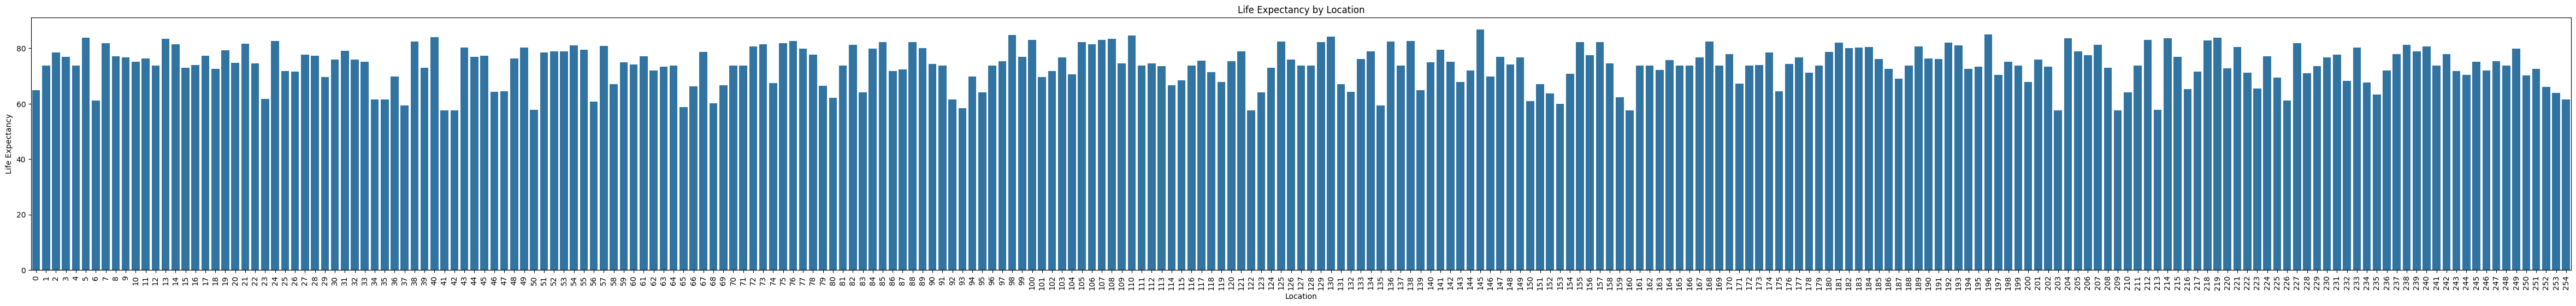

In [32]:
import seaborn as sns
plt.figure(figsize=(60, 6))
sns.barplot(x='location', y='life_expectancy', data=df)
plt.title('Life Expectancy by Location')
plt.xlabel('Location')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=90)
plt.show()

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['location']=le.fit_transform(df['location'])
# Confirm the transformation by checking unique values are numeric
print(df['location'].unique())

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

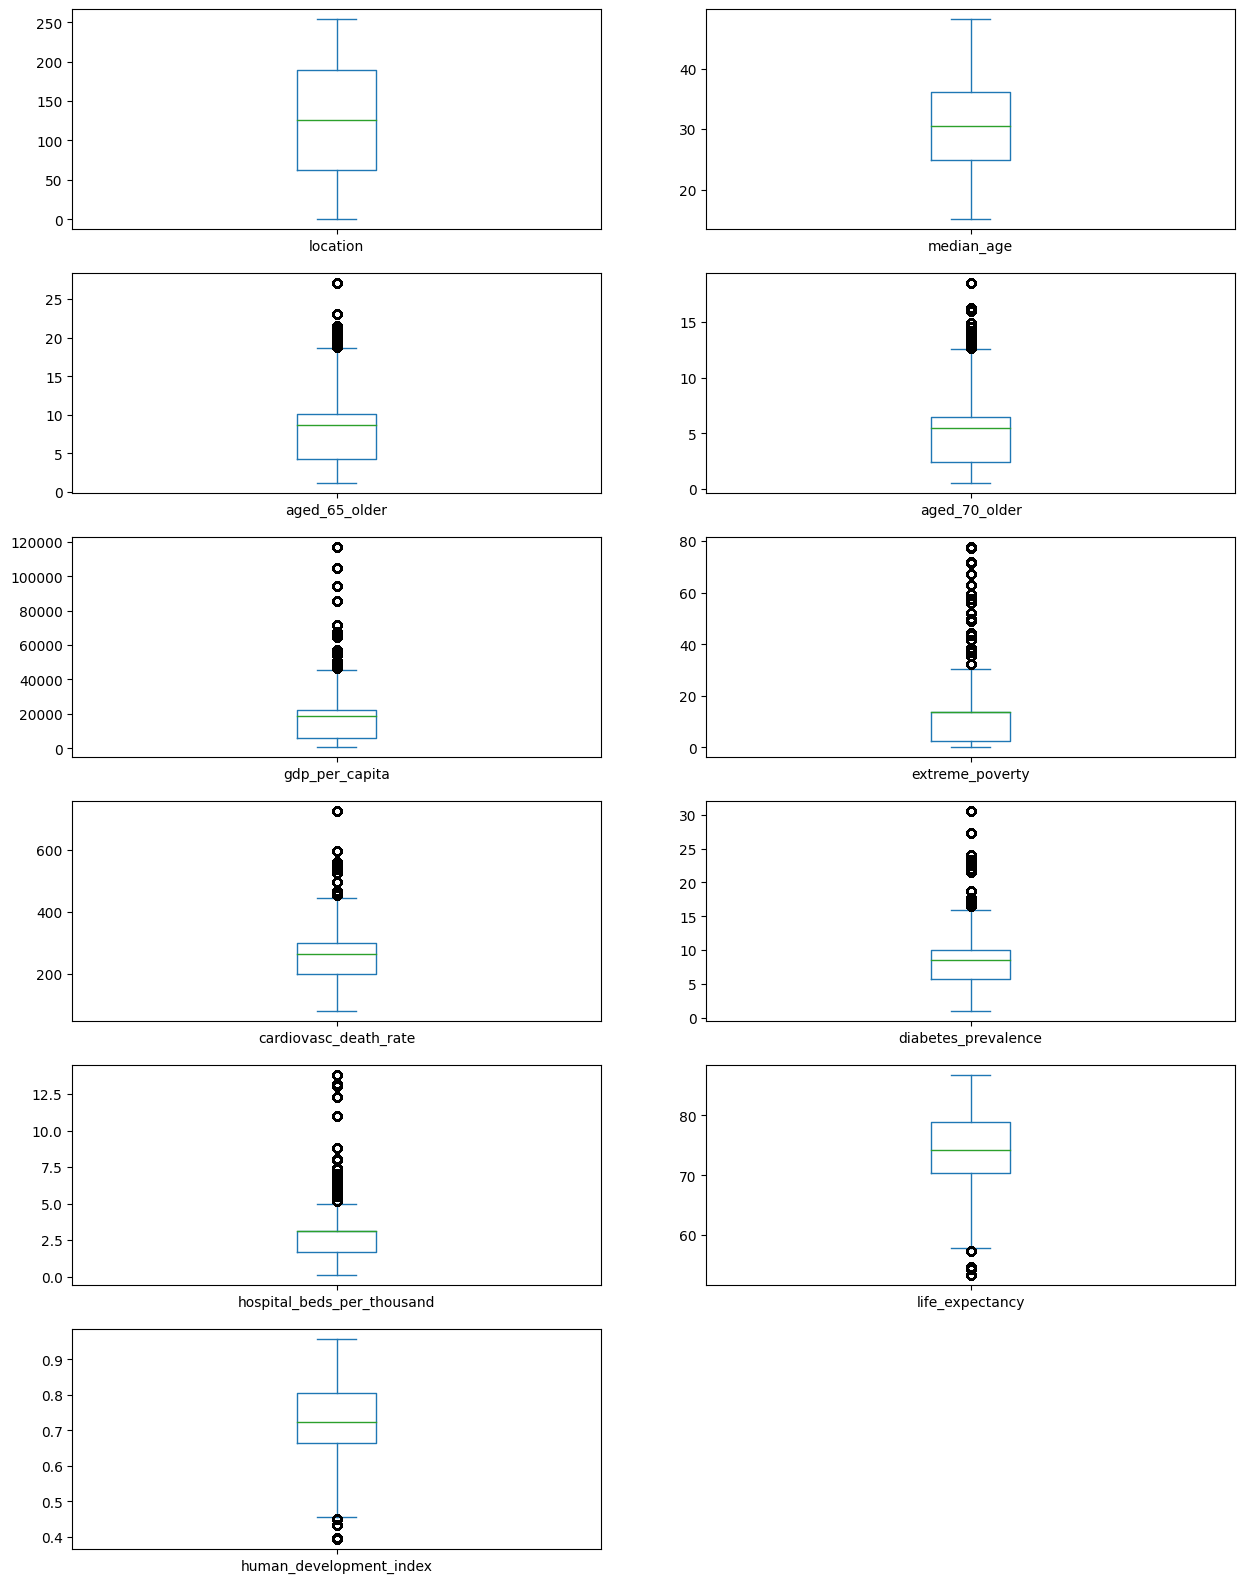

In [4]:
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20))
plt.show()

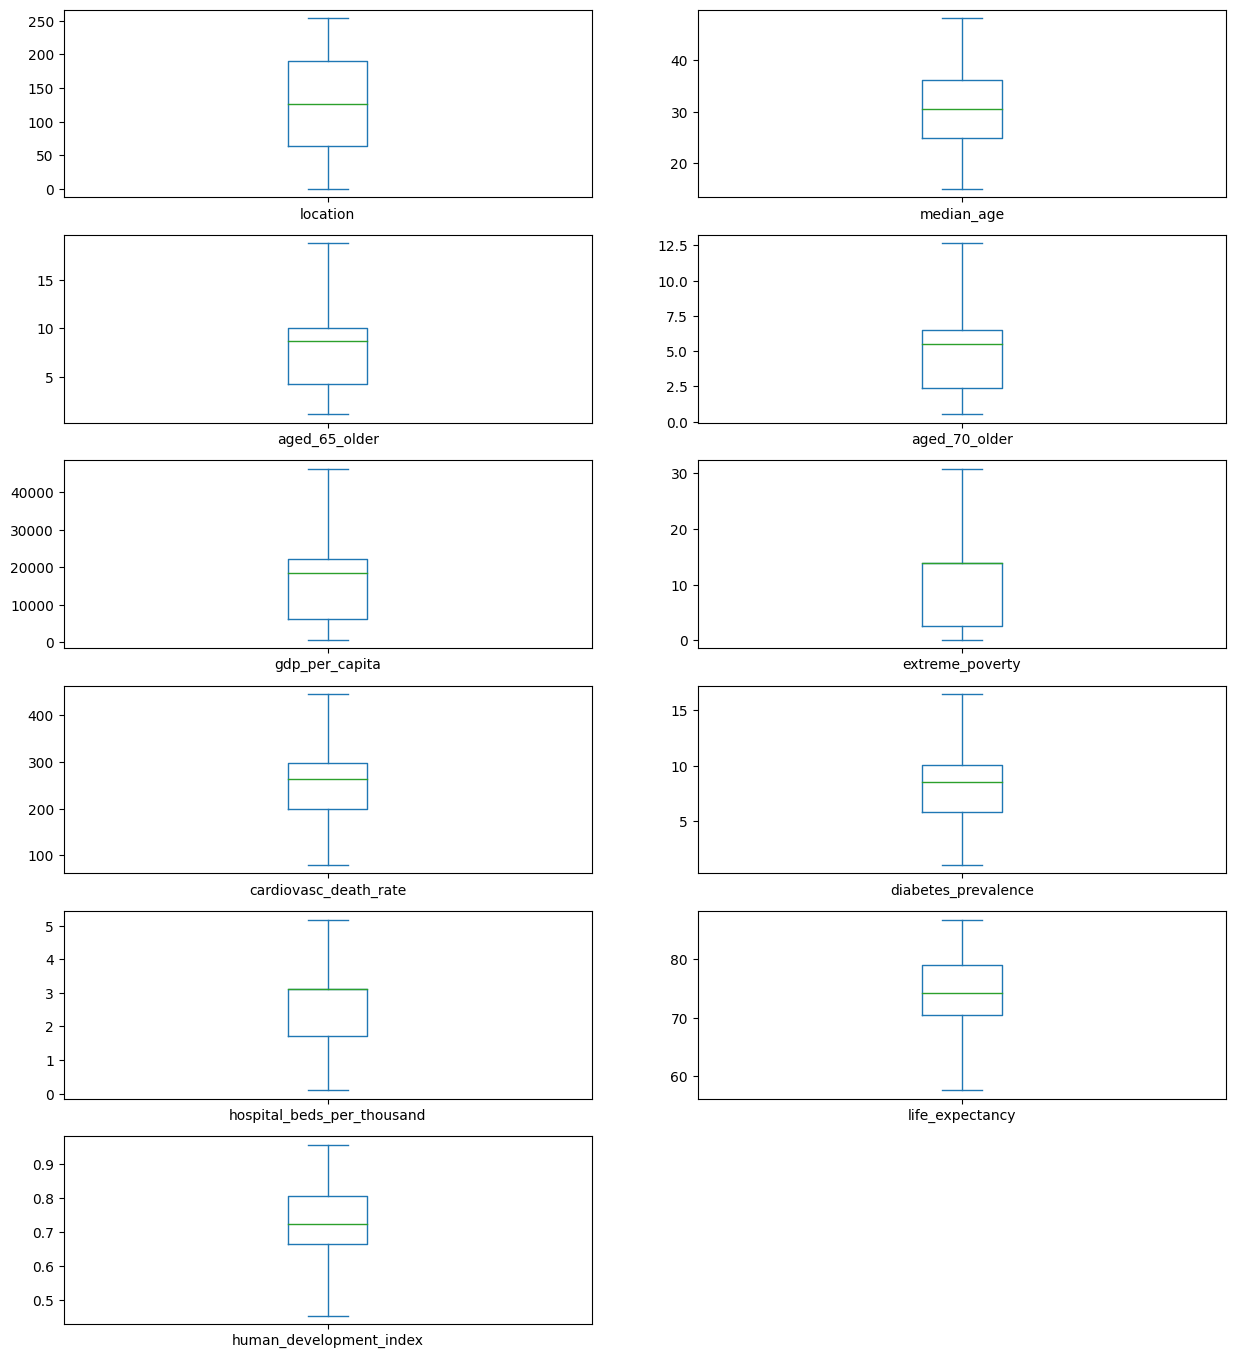

In [5]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1
df = treat_outliers_all(df , df.iloc[:,0::])

df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))
plt.show()

In [7]:
# Split data after label encoding
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define x and y after encoding 'location'
x=df[['location','median_age','aged_65_older','aged_70_older','gdp_per_capita','cardiovasc_death_rate','diabetes_prevalence','hospital_beds_per_thousand','human_development_index']]
y=df[['life_expectancy']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

regressor=LinearRegression()
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error: ",rmse)
print("R-squared:", r2)

Mean Absolute Error: 2.521659043440531
Mean Squared Error: 13.059348656645478
Root Mean Squared Error:  3.6137720814469576
R-squared: 0.7278122382805076


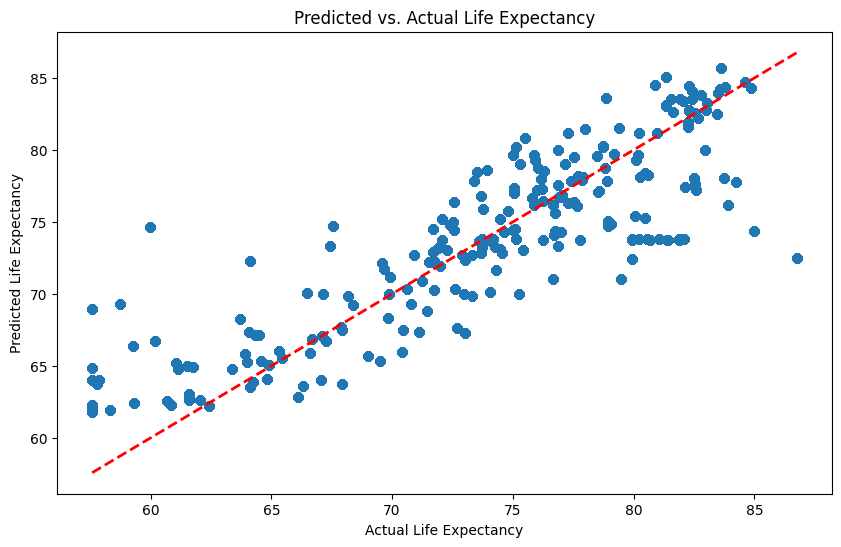

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Predicted vs. Actual Life Expectancy')
plt.show()

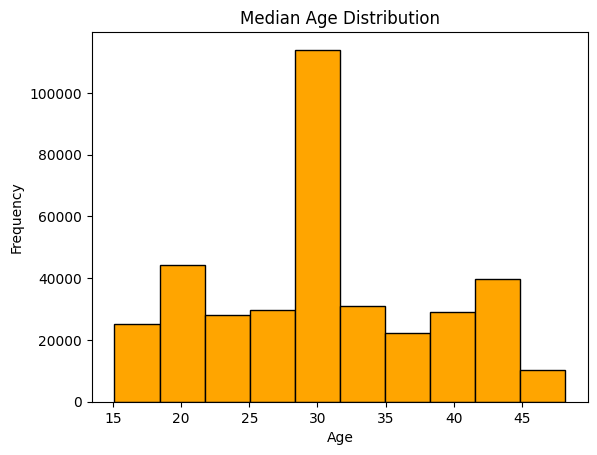

In [10]:
df['median_age'].plot.hist(color='orange',edgecolor='Black')
plt.title('Median Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

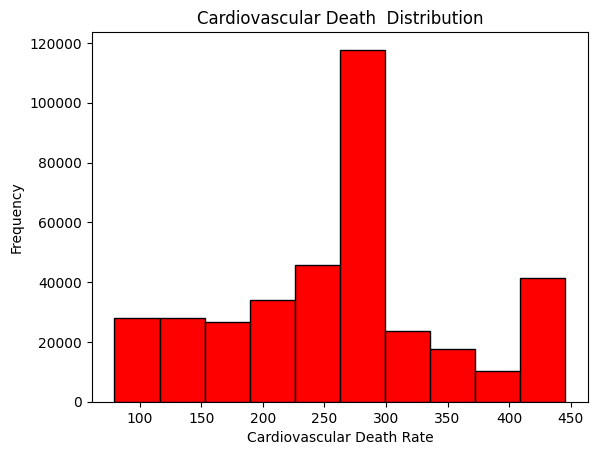

In [14]:
df['cardiovasc_death_rate'].plot.hist(color='red',edgecolor='Black')
plt.title('Cardiovascular Death  Distribution')
plt.xlabel('Cardiovascular Death Rate')
plt.ylabel('Frequency')
plt.show()

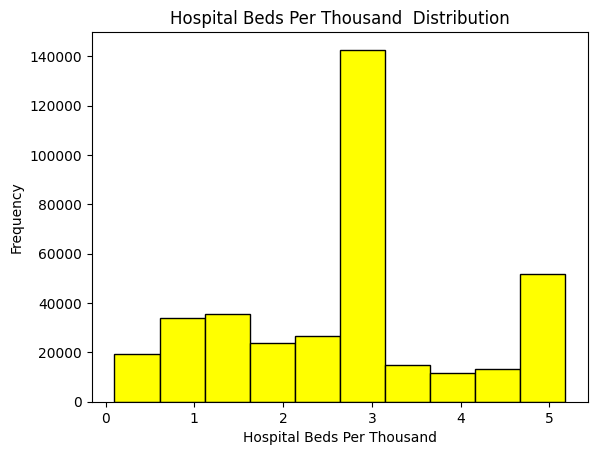

In [15]:
df['hospital_beds_per_thousand'].plot.hist(color='yellow',edgecolor='Black')
plt.title('Hospital Beds Per Thousand  Distribution')
plt.xlabel('Hospital Beds Per Thousand')
plt.ylabel('Frequency')
plt.show()

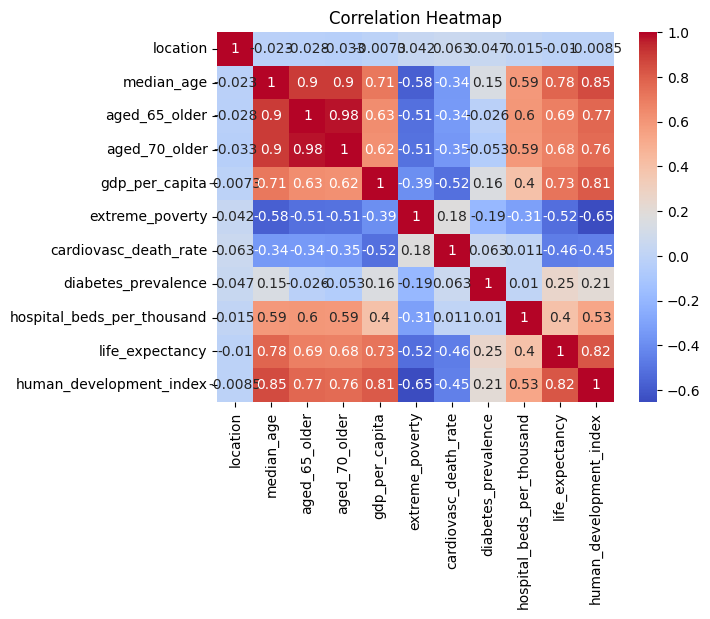

In [25]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()